## **[1] 이미지 데이터 접근하기**

1.1 구글 드라이브에 이미지 폴더 업로드하기

1.2 구글 드라이브 이미지 폴더 접근하기

In [1]:
# Google Colaboratory에서 Google Drive에 접근하는데 사용함
from google.colab import drive

# Google Drive를 /content/gdrive 디렉토리에 접근함
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#  현재 작업 디렉토리를 /content/gdrive/My Drive/data/fruit_dataset/ 디렉토리로 변경함
%cd /content/gdrive/My Drive/data/fruit_dataset/

/content/gdrive/My Drive/data/fruit_dataset


## **[2] 이미지 데이터 전처리하기**

2.1 훈련 이미지 데이터 전처리하기

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)

training_set  = train_datagen.flow_from_directory('train',
                                   target_size = (64, 64),
                                   batch_size = 32,
                                   shuffle = True,
                                   class_mode = 'categorical')

Found 400 images belonging to 2 classes.


2.2 테스트 이미지 데이터 전처리하기

In [4]:
# ImageDataGenerator를 생성함. (이미지 픽셀값을 0~1사이 범위로 조정)
test_datagen = ImageDataGenerator(rescale = 1./255)

# 주어진 폴더(test)에서 이미지 데이터를 불러와 전처리를 적용함.
test_set = test_datagen.flow_from_directory('test',
                                 target_size=(64, 64),
                                 shuffle = False,
                                 class_mode='categorical')

Found 40 images belonging to 2 classes.


## **[3] 합성곱 신경망 모델 생성하기**

3.1 훈련 이미지 데이터 특징 추출하기

In [5]:
from tensorflow.keras.applications.vgg16 import VGG16

# vgg 모델 생성하기
vgg = VGG16(include_top=False, weights='imagenet', input_shape=(64, 64, 3))
vgg.summary()

for layer in vgg.layers:
    layer.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

3.2 완전 연결 계층으로 분류모델 설계하기

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input

In [7]:
model = Sequential()
model.add(Input(shape=(64,64,3)))
model.add(vgg)
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 2, 2, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,845,954 (56.63 MB)

 Trainable params: 131,266 (512.76 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

3.3 분류 모델 환경 설정하기

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

3.4 합성곱 신경망 모델 학습하기

In [9]:
history = model.fit(training_set, epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 174s 7s/step - accuracy: 0.5898 - loss: 0.8294
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 158ms/step - accuracy: 0.8348 - loss: 0.3991
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.8520 - loss: 0.3289
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - accuracy: 0.9273 - loss: 0.2325
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.9209 - loss: 0.1927
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.9254 - loss: 0.1666
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.9595 - loss: 0.1336
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.9620 - loss: 0.1219
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9605 - loss: 0.1279 
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.9708 - loss: 0.1007


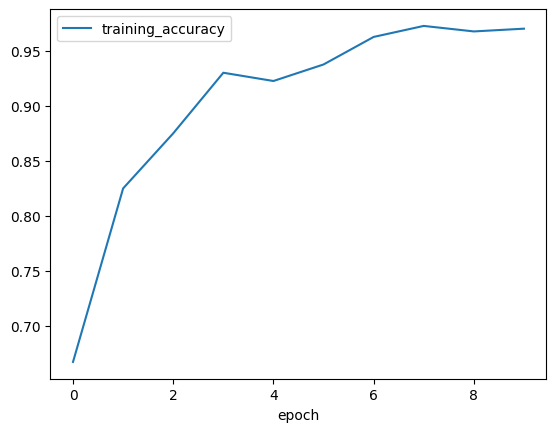

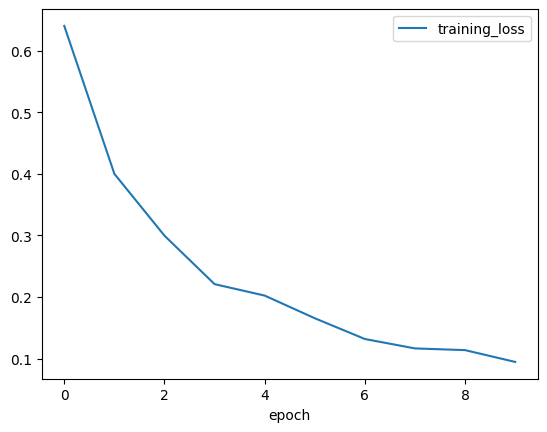

In [10]:
# 정확도(accuracy), 손실(loss) 그래프로 표현
import matplotlib.pyplot as plt

plt.xlabel('epoch')
plt.plot(history.history['accuracy'], label='training_accuracy')
plt.legend()
plt.show()


plt.xlabel('epoch')
plt.plot(history.history['loss'], label='training_loss')
plt.legend()
plt.show()

## **[4] 합성곱 신경망 모델 평가 및 예측하기**

4.1 모델 평가하기

In [11]:
model.evaluate(test_set)

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.9458 - loss: 0.2060


[0.19088846445083618, 0.949999988079071]

4.2 예측하기

In [12]:
test_set.class_indices

{'freshapples': 0, 'rottenapples': 1}

In [13]:
predictions = model.predict(test_set)
predictions

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 672ms/step


array([[9.9991357e-01, 8.6363725e-05],
       [9.9505460e-01, 4.9453685e-03],
       [9.1622108e-01, 8.3778918e-02],
       [9.9980557e-01, 1.9437561e-04],
       [9.9925476e-01, 7.4515928e-04],
       [9.9962544e-01, 3.7456094e-04],
       [8.8179106e-01, 1.1820891e-01],
       [9.9985695e-01, 1.4300479e-04],
       [9.9968690e-01, 3.1310294e-04],
       [6.3060397e-01, 3.6939606e-01],
       [9.9742389e-01, 2.5761274e-03],
       [9.8821610e-01, 1.1783922e-02],
       [9.9458081e-01, 5.4191449e-03],
       [9.3657392e-01, 6.3426115e-02],
       [9.9805450e-01, 1.9454779e-03],
       [9.9943215e-01, 5.6786236e-04],
       [9.9784744e-01, 2.1525165e-03],
       [9.9884081e-01, 1.1592088e-03],
       [9.5415533e-01, 4.5844704e-02],
       [9.9878883e-01, 1.2111699e-03],
       [1.0750238e-01, 8.9249760e-01],
       [2.3802075e-01, 7.6197922e-01],
       [5.7484597e-01, 4.2515397e-01],
       [1.9273590e-02, 9.8072642e-01],
       [2.8500769e-02, 9.7149920e-01],
       [4.5574527e-02, 9.

In [14]:
import numpy as np
print(np.argmax(predictions, axis=1))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1]


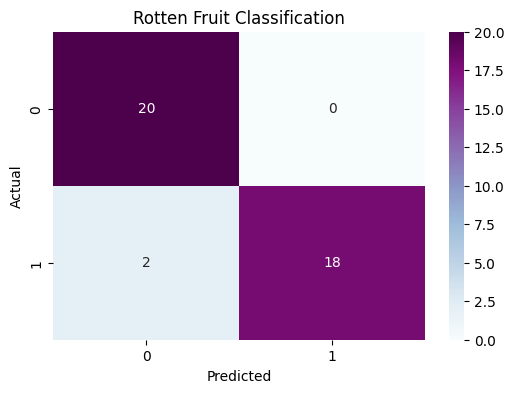

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix  # 혼동행렬 함수를 불러옴

# 예측결과에서 가장 큰 값의 인덱스를 추출함
prediction = np.argmax(predictions, axis=1)
truth =  test_set.labels   # 테스트 데이터의 실제 레이블을 가져옴

# 혼동행렬을 계산함 (실제값, 예측값)
conf = confusion_matrix(truth, prediction)

# 혼동행렬을 표시함
plt.figure(figsize=(6, 4))  # 그림 크기 설정함
sns.heatmap(conf, annot=True, cmap="BuPu")

# 제목, x축 이름(Prediction), y축 이름(Truth)을 설정함
plt.title("Rotten Fruit Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()